In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('bank.csv')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [4]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [5]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


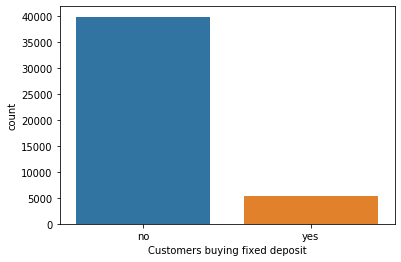

In [6]:
# Analyzing the distribution of target data
# The target variable dataset is imbalanced
sns.countplot(x='y', data=data)
plt.xlabel('Customers buying fixed deposit')
plt.show()

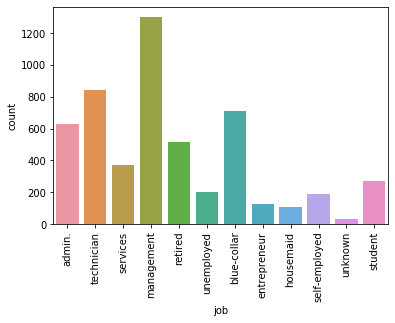

In [7]:
# Analyzing the positive conversion rates for fixed deposits
# Most positive conversions happened for people working within management roles
plt.xticks(rotation=90)
sns.countplot(x='job', data=data.loc[data['y']=='yes'])
plt.show()

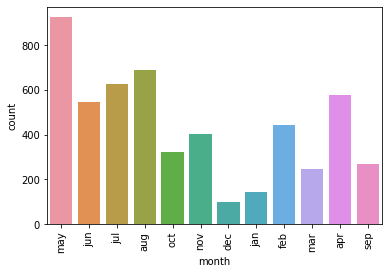

In [8]:
# Analyzing the conversion rates by month
# Most of the positive sales conversions happened in the month of may
plt.xticks(rotation=90)
sns.countplot(x='month', data=data.loc[data['y']=='yes'])
plt.show()

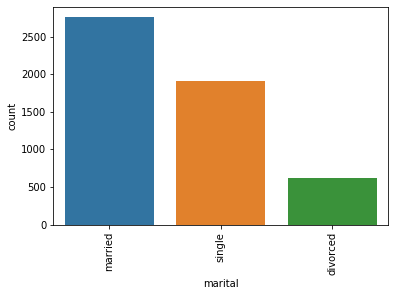

In [9]:
# Analyzing the conversion rates by marital status
# Most of the positive sales conversions happened in the month of may
plt.xticks(rotation=90)
sns.countplot(x='marital', data=data.loc[data['y']=='yes'])
plt.show()

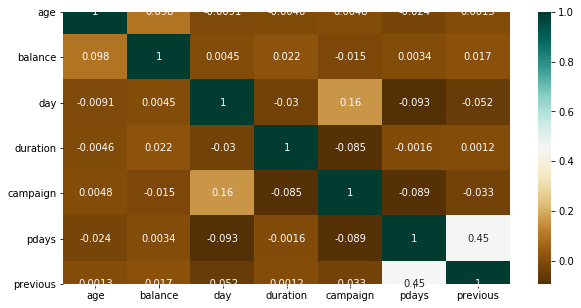

In [10]:
# Analyzing the relation between the independent and variables in the dataset.
# There is a high correlation between 'smoker' and 'charges' being paid for the insurance policy.
# This indicates that a 'smoker' is likely to pay higher charges for buying an insurance policy as compared to non-smoker. 
plt.figure(figsize=(10,5))
corr=data.corr()
sns.heatmap(corr, cmap="BrBG", annot = True)

In [11]:
# The pdays column holds the number of days that passed by after the client was last contacted from a previous campaign
# The dataset contains values such as -1 which indicates that client was not contacted previously. Hence, the column can be dropped
data.drop(columns=['pdays'], inplace=True)

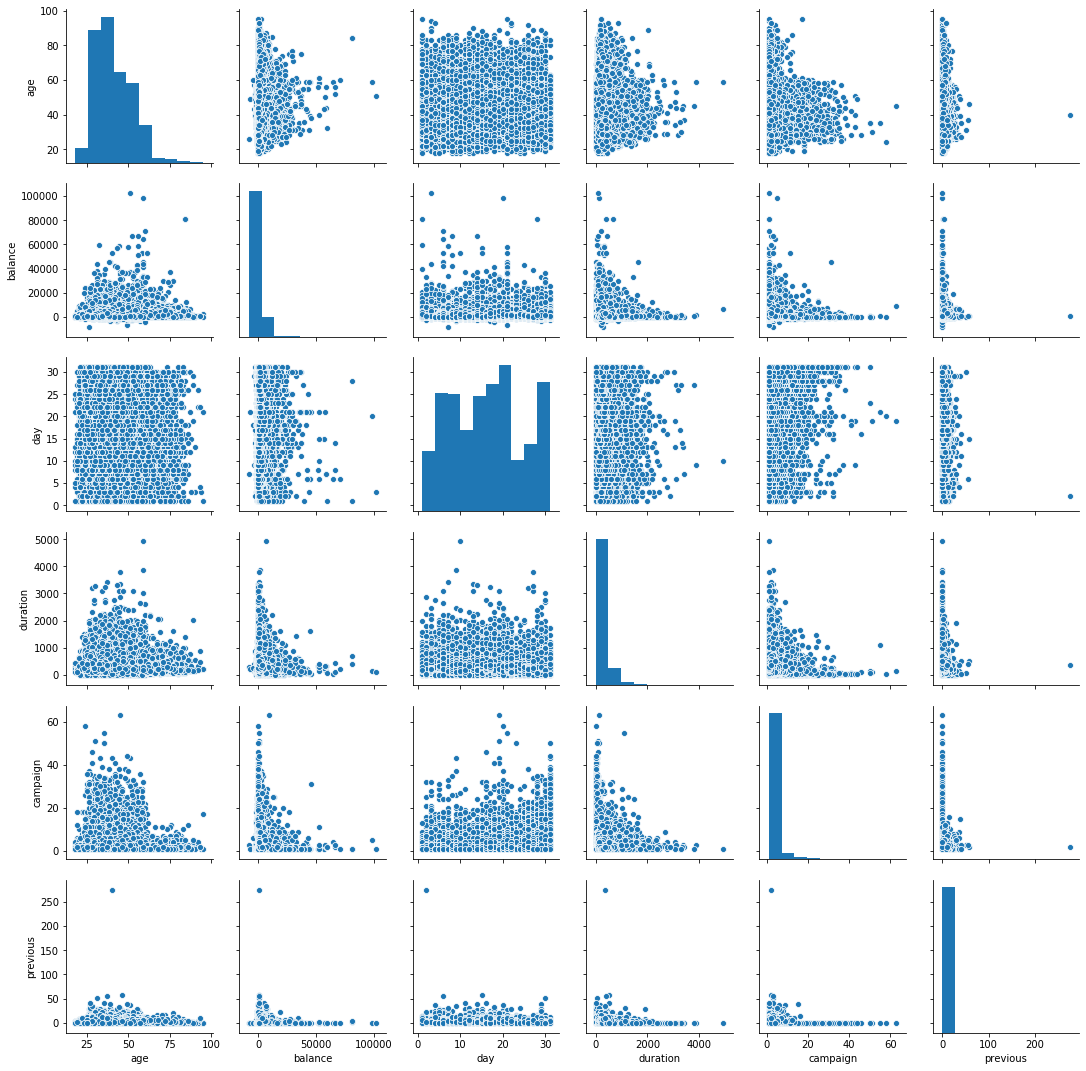

In [12]:
sns.pairplot(data)

In [13]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
print(IQR)

age           15.0
balance     1356.0
day           13.0
duration     216.0
campaign       2.0
previous       0.0
dtype: float64


In [14]:
data=data[~((data < (Q1-1.5*IQR)) | (data > (Q3+1.5*IQR))).any(axis=1)]
data.shape

(28193, 16)

In [15]:
data.skew()

age         0.383147
balance     1.342548
day         0.107774
duration    1.038646
campaign    1.154766
previous    0.000000
dtype: float64

In [16]:
# Splitting the data into dependent and independent variables
x=data.drop(columns=['y'])
y=data['y']

In [17]:
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,management,married,tertiary,no,1428,no,no,cellular,16,nov,333,2,0,unknown
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,0,unknown
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,0,unknown
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,0,unknown


In [18]:
y

0         no
1         no
2         no
3         no
4         no
        ... 
45198     no
45202    yes
45203    yes
45205    yes
45209     no
Name: y, Length: 28193, dtype: object

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y)
y=le.transform(y)
y

array([0, 0, 0, ..., 1, 1, 0])

In [20]:
# There are categorical variables in the dataset
x=pd.get_dummies(x,drop_first=True)
x

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,2143,5,261,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,44,29,5,151,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,2,5,76,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,47,1506,5,92,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,33,1,5,198,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,1428,16,333,2,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
45202,34,557,17,224,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45203,23,113,17,266,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45205,25,505,17,386,2,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [21]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x)
a=sc.transform(x)
x=pd.DataFrame(a)

In [22]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
def maxrocaucscore(cm,x,y):
    max_roc_auc=0
    for r_state in range(0,150):
        x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = r_state,test_size=0.20, stratify=y)
        cm.fit(x_train,y_train)
        y_pred=cm.predict(x_test)
        fsc=roc_auc_score(y_test,y_pred)
        if fsc>max_roc_auc:
            max_roc_auc=fsc
            rs=r_state
    print('Maximum roc_auc score is :', max_roc_auc, 'at random state :', rs)

In [23]:
# Using Logistic regression
Logreg=LogisticRegression()
C = [0.001,0.01,0.1,1,10]
penalty=['l1', 'l2']
hyperparametersLogreg=dict(C=C, penalty=penalty)
gridlr=GridSearchCV(Logreg, hyperparametersLogreg, cv=5, scoring='roc_auc', n_jobs=-1)
gridlr.fit(x,y)
print(gridlr.best_params_)

{'C': 0.001, 'penalty': 'l1'}


In [24]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=0.001, penalty='l1')
maxrocaucscore(lr,x,y)

Maximum roc_auc score is : 0.5 at random state : 0


In [25]:
# Using cross validation score to avoid underfitting and overfitting of model
print('Mean cross validation score for roc_auc score is:', cross_val_score(lr,x,y,cv=5,scoring="roc_auc").mean())
print("Standard deviation in roc_auc score is: ",cross_val_score(lr,x,y,cv=5,scoring="roc_auc").std())

Mean cross validation score for roc_auc score is: 0.7621816225135399
Standard deviation in roc_auc score is:  0.07225158249018725


In [26]:
# Using Decision Tree Classifier
dtc=DecisionTreeClassifier()
hyperparametersdtc={'criterion':['gini','entropy'],'max_depth':range(1,10)}
griddtc=GridSearchCV(dtc, hyperparametersdtc, cv=5, scoring='roc_auc')
griddtc.fit(x,y)
print(griddtc.best_params_)

{'criterion': 'entropy', 'max_depth': 2}


In [27]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy', max_depth=2)
maxrocaucscore(dtc,x,y)

Maximum roc_auc score is : 0.5 at random state : 0


In [37]:
# Using cross validation score to avoid underfitting and overfitting of model
print('Mean cross validation score for Decision Tree Classifier is:', cross_val_score(dtc,x,y,cv=5,scoring="roc_auc").mean())
print("Standard deviation in roc_auc score is: ",cross_val_score(dtc,x,y,cv=5,scoring="roc_auc").std())

Mean cross validation score for Decision Tree Classifier is: 0.6208279566547057
Standard deviation in roc_auc score is:  0.055193535084214346


In [35]:
# Using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier()
parametersrfc={'n_estimators':[100,150,200,250,300]}
rfc1 = GridSearchCV(rfc, parametersrfc, cv=5,scoring="roc_auc", n_jobs=-1)
rfc1.fit(x,y)
rfc1.best_params_

{'n_estimators': 250}

In [36]:
rfc=RandomForestClassifier(n_estimators=250)
maxrocaucscore(rfc,x,y)

Maximum roc_auc score is : 0.5897434315660838 at random state : 71


In [38]:
# Using cross validation score to avoid underfitting and overfitting of model
print('Mean cross validation score for Random Forest Classifier is:', cross_val_score(rfc,x,y,cv=5,scoring="roc_auc").mean())
print("Standard deviation in roc_auc score is: ",cross_val_score(rfc,x,y,cv=5,scoring="roc_auc").std())

Mean cross validation score for Random Forest Classifier is: 0.4420727299041124
Standard deviation in roc_auc score is:  0.19514189847271857


In [47]:
# Among all the models, Logistic Regression is the best performing model
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 0,test_size=0.20,stratify=y)
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('classification_report \n', classification_report(y_test,y_pred))
print('Accuracy score: ', accuracy_score(y_test,y_pred))
print('Confusion matrix \n', confusion_matrix(y_test,y_pred))
print('AUC ROC Score: ', roc_auc_score(y_test,y_pred))

classification_report 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      5319
           1       0.46      0.14      0.22       320

    accuracy                           0.94      5639
   macro avg       0.70      0.57      0.59      5639
weighted avg       0.92      0.94      0.93      5639

f1 score:  0.9418336584500798
Confusion matrix 
 [[5266   53]
 [ 275   45]]
AUC ROC Score:  0.565330360500094


In [48]:
# Saving the decision tree model
from sklearn.externals import joblib 
joblib.dump(lr, 'Bank_marketing_lr.pkl')

['Bank_marketing_lr.pkl']